****Loading the data

first we are loading data from sqlite file as it is easy to load data from database.

for doing all opearions we may need different librarires.

they are as follow.




In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sqlite3
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import warnings

warnings.filterwarnings('ignore')


C:\Users\mahesh\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# now will load data from sqlite file
# here will ignore the values which are having 'SCORE' value 3 as they cant be considered in positive or negative review.



In [2]:
##**From sqlite file load data

con=sqlite3.connect('database.sqlite')

filtered_data=pd.read_sql_query("""select * from REVIEWS where Score !=3""",con)


actual_score=filtered_data['Score']

def partition(x):
    
    if x<3:
        return 'negative'
    else:
        return 'positive'

actual_score1=actual_score.map(partition)  #using map function we are converting each integer value to poitive and negative


filtered_data['Score']=actual_score1  #replacing integer value with sting

print(filtered_data.shape)



(525814, 10)


# Now will do de duplication that is removing duplicate values

In [3]:
sorted_data=filtered_data.sort_values('ProductId',axis=0,ascending=True)
print(sorted_data.shape)
#print(sorted_data)

final=sorted_data.drop_duplicates(subset={'UserId','ProfileName','Score','Time','Text'},keep='first',inplace=False)
print(final.shape)

(525814, 10)
(364177, 10)


# We can see the difference in values 
# Lets count how many positive reviews are there

In [4]:
final['Score'].value_counts()

positive    307065
negative     57112
Name: Score, dtype: int64

# Text Preprocessing: Stemming, stop-word removal and Lemmatization.

# 1.stopwords
# 2.stemming
# 3.functions to remove HTML ,punctuation,special character


In [5]:
# set stopwords
stop=set(stopwords.words('english'))


#enable snowball stemmer
sno=nltk.stem.SnowballStemmer('english')
print(sno.stem('speaking'))


#function to remove html tags
def cleanhtml(sentence):
    cleaner=re.compile('<.*?>')
    cleantext=re.sub(cleaner,' ',sentence)
    return cleantext


#function to remove any puntuation or speacial charater
def cleanpunct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned1 = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned1


speak


# code to execute step by step procedure of preprocessing

In [6]:
final_string=[]
all_positive_words=[]
all_negative_words=[]

for i, sent in enumerate(tqdm(final['Text'].values)):
#for sent in final['Text'].values():
    filtered_string=[]
    sent1=cleanhtml(sent)
    for w in sent1.split():
        
        for cleaned_words in cleanpunct(w).split():
            if ((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if (cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_string.append(s)
                    if (final['Score'].values)[i] =='positive': 
                        all_positive_words.append(s)
                    if (final['Score'].values)[i] == 'negative': 
                        all_negative_words.append(s)
    str1= b" ".join(filtered_string)
    final_string.append(str1)
    final_string
    

                    
                    

100%|█████████████████████████████████| 364177/364177 [13:31<00:00, 448.67it/s]


In [7]:
#print(final_string)

# Now will add one extra coloumn 

In [8]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
#final['CleanedText']=final['CleanedText'].str.decode("utf-8")

final['Cleaned_text']=final_string
final['Cleaned_text']=final['Cleaned_text'].str.decode("utf-8")

# store the final value to sql table

conn=sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviews', conn,  schema=None, if_exists='replace', \
                 index=True, index_label=None, chunksize=None, dtype=None)
conn.close()

In [9]:
conn = sqlite3.connect('final.sqlite')
final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, conn)
final

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Cleaned_text
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...,grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,b'great littl book read nice rhythm well good ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...,book poetri month year goe month cute littl po...
5,138693,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,positive,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci...",b'charm rhyme book describ circumst eat dont c...,charm rhyme book describ circumst eat dont chi...
6,138694,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,positive,1338249600,Must have.,I set aside at least an hour each day to read ...,b'set asid least hour day read son point consi...,set asid least hour day read son point consid ...
7,138695,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,positive,1325721600,A classic,I remembered this book from my childhood and g...,b'rememb book childhood got kid good rememb ki...,rememb book childhood got kid good rememb kid ...
8,138696,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,positive,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....,b'great book ador illustr true classic kid lov...,great book ador illustr true classic kid love ...
9,138697,150515,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,positive,1303171200,One of our family's favorite books,This book is a family favorite and was read to...,b'book famili favorit read children small orde...,book famili favorit read children small order ...


In [10]:
#l2=l2[:100]
#l4=l2.toarray()
#print(l.head(10))
#print('====================')

#print(l.shape)
#print(l4.shape)

#print(l2.shape)

# we can count number of positive and negative reviews

# Bag of words

# Here we can see the difference in number of words of Text and Cleaned text column

In [11]:
count_vect=CountVectorizer()


final_count=count_vect.fit_transform(final['Text'].values)

final_count1=count_vect.fit_transform(final['Cleaned_text'].values)



#type(final_count)

print(final_count.shape)
print(final_count1.shape)

(364177, 115282)
(364177, 71625)


In [12]:
print(final['Cleaned_text'])

0         witti littl book make son laugh loud recit car...
1         grew read sendak book watch realli rosi movi i...
2         fun way children learn month year learn poem t...
3         great littl book read nice rhythm well good re...
4         book poetri month year goe month cute littl po...
5         charm rhyme book describ circumst eat dont chi...
6         set asid least hour day read son point consid ...
7         rememb book childhood got kid good rememb kid ...
8         great book ador illustr true classic kid love ...
9         book famili favorit read children small order ...
10        get movi sound track sing along carol king gre...
11        author wrote wild thing carol king wrote great...
12        great book perfect condit arriv short amount t...
13        ive alway love chicken soup rice late ethel al...
14        book purchas birthday gift year old boy squeal...
15        year old daughter brought book home school lib...
16        book contain collect twelv sho

# here is the list of all positive words and negative words

In [13]:
freq_dist_positive=nltk.FreqDist(all_positive_words)
freq_dist_negative=nltk.FreqDist(all_negative_words)
print("Most Common Positive Words : ",freq_dist_positive.most_common(20))
print("Most Common Negative Words : ",freq_dist_negative.most_common(20))

Most Common Positive Words :  [(b'like', 139433), (b'tast', 129052), (b'good', 112766), (b'flavor', 109630), (b'love', 107362), (b'use', 103892), (b'great', 103872), (b'one', 96728), (b'product', 91039), (b'tri', 86796), (b'tea', 83893), (b'coffe', 78814), (b'make', 75108), (b'get', 72126), (b'food', 64806), (b'would', 55569), (b'time', 55264), (b'buy', 54198), (b'realli', 52717), (b'eat', 52004)]
Most Common Negative Words :  [(b'tast', 34589), (b'like', 32334), (b'product', 28218), (b'one', 20572), (b'flavor', 19575), (b'would', 17974), (b'tri', 17755), (b'use', 15304), (b'good', 15041), (b'coffe', 14717), (b'get', 13787), (b'buy', 13752), (b'order', 12872), (b'food', 12754), (b'dont', 11877), (b'tea', 11665), (b'even', 11088), (b'box', 10844), (b'amazon', 10074), (b'make', 9840)]


# use of n grams


In [14]:
count_vect=CountVectorizer(ngram_range=(1,2))
final_bigram_counts=count_vect.fit_transform(final['Cleaned_text'].values)
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())



the shape of out text BOW vectorizer  (364177, 2923737)


# TF IDF 


In [15]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final['Cleaned_text'].values)
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())

the shape of out text TFIDF vectorizer  (364177, 2923737)


# get top feature name and their values

In [16]:
feature_name=tf_idf_vect.get_feature_names()
len(feature_name)

2923737

# avg word to vec using google model

In [17]:
#import gensim
#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
#import pickle
#model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300 (1).bin')
#model =gensim.models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


# training own word2vec model

In [18]:
import gensim

i=0
list_of_sent=[]

for sent in final['Cleaned_text'].values:
    #sent=str(sent)
    list_of_sent.append(sent.split())
    
print(final['Cleaned_text'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

# min_count = 5 considers only words that occured atleast 5 times

w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=2)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']
number of words that occured minimum 5 times  21938
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'c

In [19]:
#print(list_of_sent)
#list_of_sent=str(list_of_sent)
#w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=2)



In [20]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  21938
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two']


In [21]:
w2v_model.wv.most_similar('tasti')

[('delici', 0.8181303143501282),
 ('yummi', 0.7884075045585632),
 ('tastey', 0.7637428045272827),
 ('satisfi', 0.6928894519805908),
 ('good', 0.6718262434005737),
 ('nice', 0.6654911041259766),
 ('hearti', 0.6651023030281067),
 ('delish', 0.648357093334198),
 ('crunchi', 0.6281685829162598),
 ('nutriti', 0.6208838820457458)]

In [22]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|█████████████████████████████████| 364177/364177 [19:13<00:00, 321.87it/s]


364177
50


# weighted tfidfword2vec


In [25]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model_dict = TfidfVectorizer()
tf_idf_matrix = model_dict.fit_transform(final['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model_dict.get_feature_names(), list(model_dict.idf_)))

In [27]:
# TF-IDF weighted Word2Vec
tfidf_feat = model_dict.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|█████████████████████████████████| 364177/364177 [27:09<00:00, 223.52it/s]


# tsne model for tfidfavg word2 vec

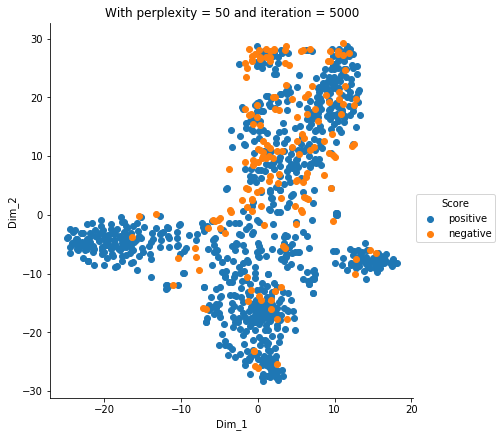

In [30]:
from sklearn.manifold import TSNE

l=final['Score']   # taking score column data in l 
l3=l[0:500]
l4=l[500:1000]

l5=pd.concat([l3,l4])  # converting list to pandas dataframe


tfidf_sent_vectors_1000=tfidf_sent_vectors[0:1000]

tf_avg_w2v=np.vstack(tfidf_sent_vectors_1000)

model_avg_tfidf =TSNE(n_components=2, perplexity=50, n_iter= 5000, \
              random_state=0)
tsne_tf_avgw2v = model_avg_tfidf.fit_transform(tf_avg_w2v)

# creating a new data frame which help us in ploting the result data
tsne_tf_avgw2v = np.vstack((tsne_tf_avgw2v.T, l5)).T
tsne_tf_avgw2v_df = pd.DataFrame(data=tsne_tf_avgw2v, columns=("Dim_1", \
                                                         "Dim_2", "Score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_tf_avgw2v_df, hue="Score", size=6).map(plt.scatter, \
                                                       'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50 and iteration = 5000')
plt.show()

# Tsne model for avgw2v


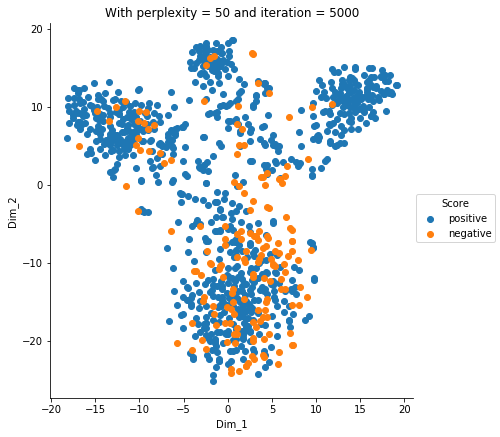

In [31]:
sent_vectors_1000=sent_vectors[0:1000]

avg_w2v=np.vstack(sent_vectors_1000)

model_avg = TSNE(n_components=2, perplexity=50, n_iter= 5000, \
              random_state=0)
tsne_avgw2v = model_avg.fit_transform(avg_w2v)

# creating a new data frame which help us in ploting the result data
tsne_avgw2v = np.vstack((tsne_avgw2v.T, l5)).T
tsne_avgw2v_df = pd.DataFrame(data=tsne_avgw2v, columns=("Dim_1", \
                                                         "Dim_2", "Score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_avgw2v_df, hue="Score", size=6).map(plt.scatter, \
                                                       'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50 and iteration = 5000')
plt.show()


# Tsne model for BOW

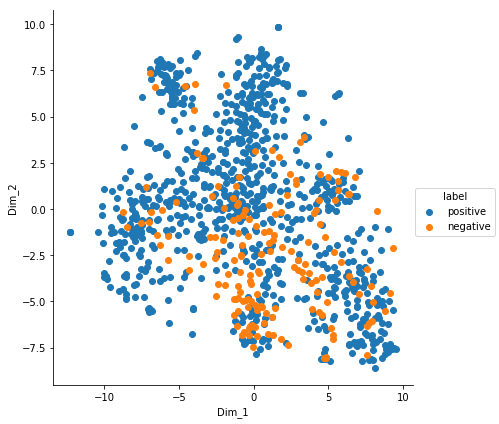

In [32]:

l=final['Score']   # taking score column data in l 

#l2=count_vect.fit_transform(l.values)  


from sklearn.manifold import TSNE
import seaborn as sn


data_10000_final_count1=final_count1[0:1000]  # taking first 1000 rowa of cleaned_text vector
#data_10000_final_count12=final_count1[100:200]



l3=l[0:500]
l4=l[500:1000]

l5=pd.concat([l3,l4])  # converting list to pandas dataframe


data_10000_final_count2=data_10000_final_count1.toarray()   


#model = TSNE(n_components=2, random_state=0)

model_bow = TSNE(n_components=2, perplexity=50, n_iter= 7000,\
                        random_state=0)

tsne_data = model_bow.fit_transform(data_10000_final_count2)


tsne_data1 = np.vstack((tsne_data.T,l5)).T

tsne_df = pd.DataFrame(data=tsne_data1, columns=("Dim_1", "Dim_2", "label"))


sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()



# changing perplexity value

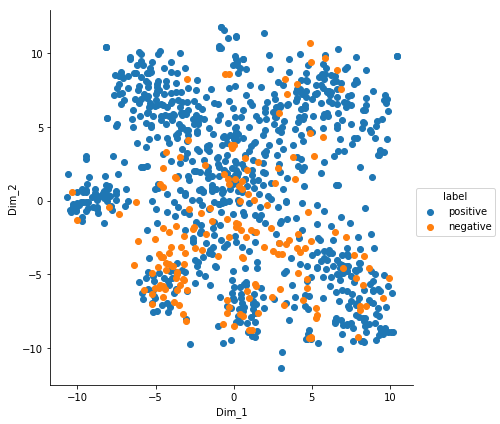

In [33]:

model2 = TSNE(n_components=2, perplexity=40, n_iter= 7000,\
                        random_state=0)
tsne_data = model2.fit_transform(data_10000_final_count2)


tsne_data1 = np.vstack((tsne_data.T,l5)).T

tsne_df = pd.DataFrame(data=tsne_data1, columns=("Dim_1", "Dim_2", "label"))


sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()


# tsne model for tfidf vector

here will use same score column to compare postive and negative values output for tfidf vector.

In [34]:
print(final['Cleaned_text'].shape)

final_1=final['Cleaned_text']

final_2=final_1[0:1000]
print(final_2.shape)

(364177,)
(1000,)


In [35]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf_1000 = tf_idf_vect.fit_transform(final_2.values)
print("the shape of out text TFIDF vectorizer ",final_tf_idf_1000.get_shape())

the shape of out text TFIDF vectorizer  (1000, 38335)


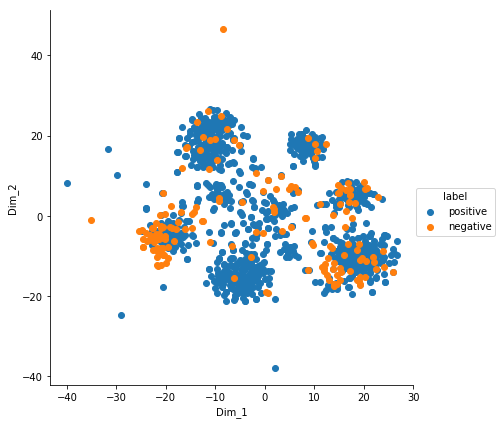

In [36]:

#l6=l[0:250]
#l7=l[250:500]

#l8=pd.concat([l6,l7])  # converting list to pandas dataframe

#print(l8.shape)

#tf_idf_tsne=final_tf_idf[0:500]
#print(tf_idf_tsne.shape)

data_tf_idf_tsne=final_tf_idf_1000.toarray()
model_tf = TSNE(n_components=2, perplexity=50, n_iter= 7000,\
                        random_state=0)


tsne_data_tf_idf = model_tf.fit_transform(data_tf_idf_tsne)

tsne_data2 = np.vstack((tsne_data_tf_idf.T,l5)).T

tsne_df2 = pd.DataFrame(data=tsne_data2, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df2, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()



# tsne model for n grams



In [37]:
print(final['Cleaned_text'].shape)

final_1=final['Cleaned_text']

final_2=final_1[0:1000]
print(final_2.shape)

(364177,)
(1000,)


In [38]:
count_vect=CountVectorizer(ngram_range=(1,2))
final_bigram_counts2=count_vect.fit_transform(final_2.values)
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())


the shape of out text BOW vectorizer  (364177, 2923737)


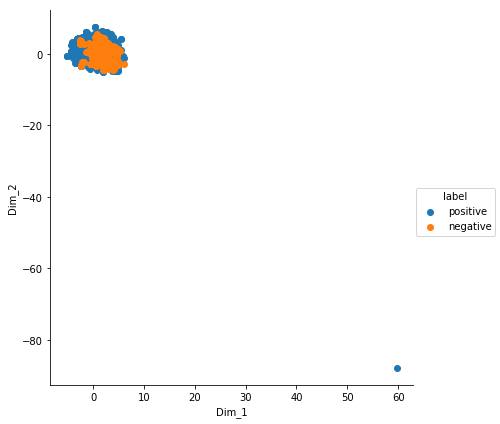

In [39]:
data_bigrams_tsne=final_bigram_counts2.toarray()
model_bi = TSNE(n_components=2, perplexity=50, n_iter= 7000,\
                        random_state=0)


tsne_data_bigrams = model_bi.fit_transform(data_bigrams_tsne)

tsne_data3 = np.vstack((tsne_data_bigrams.T,l5)).T

tsne_df3 = pd.DataFrame(data=tsne_data3, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df3, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()